# 1. Import Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import scipy.io
import time
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import MaxPooling1D, Conv1D, GlobalAveragePooling1D, Reshape
from tensorflow.keras.layers import GlobalAveragePooling2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Input, Dropout, Conv2D, BatchNormalization, MaxPool2D, Activation

# 2. Load Data

In [12]:
dataset1 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMNYXZ_signal.mat')
dataset2 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMNYZX_signal.mat')
dataset3 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMXNYZ_signal.mat')
dataset4 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMXYZ_signal.mat')
dataset5 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMXZNY_signal.mat')
dataset6 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMXZY_signal.mat')
dataset7 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMYXZ_signal.mat')
dataset8 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMYZX_signal.mat')
dataset9 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMZNYX_signal.mat')
dataset10 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMZXNY_signal.mat')
dataset11 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMZXY_signal.mat')
dataset12 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMZYX_signal.mat')

labelset1 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMNYXZ_Y.mat')
labelset2 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMNYZX_Y.mat')
labelset3 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMXNYZ_Y.mat')
labelset4 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMXYZ_Y.mat')
labelset5 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMXZNY_Y.mat')
labelset6 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMXZY_Y.mat')
labelset7 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMYXZ_Y.mat')
labelset8 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMYZX_Y.mat')
labelset9 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMZNYX_Y.mat')
labelset10 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMZXNY_Y.mat')
labelset11 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMZXY_Y.mat')
labelset12 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMZYX_Y.mat')

# 3. Process Data

In [13]:

signal_matrix = np.concatenate((dataset1['signal_matrix'], dataset2['signal_matrix'],
                                dataset3['signal_matrix'], dataset4['signal_matrix'],
                                dataset5['signal_matrix'], dataset6['signal_matrix'],
                                dataset7['signal_matrix'], dataset8['signal_matrix'],
                                dataset8['signal_matrix'], dataset10['signal_matrix'],
                                dataset11['signal_matrix'], dataset12['signal_matrix']), axis=2)

#signal_matrix = np.concatenate((dataset1['signal_matrix'], dataset2['signal_matrix']), axis=2)
#print("shape", signal_matrix.shape)
zeros = np.zeros((65,8,signal_matrix.shape[2]))
#print("shape", zeros.shape)
input_matrix = np.concatenate((zeros, signal_matrix), axis=0)
input_matrix = np.concatenate((input_matrix, zeros), axis=0).T
X = input_matrix.reshape(input_matrix.shape[0],-1)

label = np.concatenate((labelset1['label'], labelset2['label'],
                        labelset3['label'], labelset4['label'],
                        labelset5['label'], labelset6['label'],
                        labelset7['label'], labelset8['label'],
                        labelset9['label'], labelset10['label'],
                        labelset11['label'], labelset12['label']), axis=0)

#label = np.concatenate((labelset1['label'], labelset2['label']), axis=0)
print("Input Shape", X.shape)
print("Label Shape", label.shape)
#plt.plot(np.arange(1,201), input_matrix[:,0,0])

Input Shape (12780, 1600)
Label Shape (12780, 4124)


# 4. Split into train and dev set

In [14]:
X = normalize(X, axis=0, norm='max')
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5)
print(f"X_train = {X_train.shape}")
print(X_train)
print(f"y_train = {y_train.shape}")
print(y_train)
print(f"X_dev = {X_dev.shape}")
print(X_dev)
print(f"y_dev = {y_dev.shape}")
print(y_dev)
print(f"X_test = {X_test.shape}")
print(X_test)
print(f"y_test = {y_test.shape}")
print(y_test)

X_train = (10224, 1600)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train = (10224, 4124)
[[0.12992218 0.17288485 0.14159463 ... 0.09136094 0.07719334 0.07686251]
 [0.12224443 0.18203281 0.13639404 ... 0.08295876 0.07281441 0.09416115]
 [0.25360566 0.18237206 0.21865572 ... 0.05128093 0.04437639 0.04647793]
 ...
 [0.04905418 0.07729251 0.0769983  ... 0.04227769 0.03575064 0.04230411]
 [0.21440686 0.19412099 0.21296817 ... 0.05258987 0.04482545 0.04679304]
 [0.04237234 0.03545561 0.03468801 ... 0.01781847 0.01437013 0.01441202]]
X_dev = (1278, 1600)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_dev = (1278, 4124)
[[0.06907566 0.08826523 0.07556453 ... 0.03739307 0.03421932 0.03763163]
 [0.03342889 0.04949933 0.04905144 ... 0.02536868 0.02136995 0.02530096]
 [0.0347

# 5. Training

In [15]:
# The number of steps within one time segment
num_classes = y_train.shape[1]
kernel_size = 2

input1 = keras.Input(shape=(1600,1))
x = Conv1D(64, kernel_size, activation='relu')(input1)
x = Conv1D(64, kernel_size, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Flatten()(x)
x = Dense(1000, activation='relu')(x)
x = Dense(100, activation='relu')(x)
output1 = Dense(num_classes)(x)
model_conv1D = tf.keras.Model(inputs=input1, outputs=output1)

Adam = tf.keras.optimizers.Adam(learning_rate = 0.001, decay=1e-6)
model_conv1D.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='Adam', metrics=['MeanSquaredError'])

print(model_conv1D.summary())

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_dev_reshaped = np.reshape(X_dev, (X_dev.shape[0], X_dev.shape[1], 1))

history = model_conv1D.fit(X_train_reshaped, y_train, epochs=100,
          batch_size=128, verbose=1,
          validation_data=(X_dev_reshaped, y_dev))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1600, 1)]         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1599, 64)          192       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1598, 64)          8256      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 799, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 51136)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              51137000  
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1001

80/80 [==============================] - 23s 285ms/step - loss: 1.7767e-04 - mean_squared_error: 1.7767e-04 - val_loss: 2.2949e-04 - val_mean_squared_error: 2.2949e-04
Epoch 39/100
80/80 [==============================] - 23s 285ms/step - loss: 1.7376e-04 - mean_squared_error: 1.7376e-04 - val_loss: 2.2877e-04 - val_mean_squared_error: 2.2877e-04
Epoch 40/100
80/80 [==============================] - 23s 282ms/step - loss: 1.7228e-04 - mean_squared_error: 1.7228e-04 - val_loss: 2.2674e-04 - val_mean_squared_error: 2.2674e-04
Epoch 41/100
80/80 [==============================] - 24s 297ms/step - loss: 1.7314e-04 - mean_squared_error: 1.7314e-04 - val_loss: 2.3726e-04 - val_mean_squared_error: 2.3726e-04
Epoch 42/100
80/80 [==============================] - 23s 289ms/step - loss: 1.7763e-04 - mean_squared_error: 1.7763e-04 - val_loss: 2.2617e-04 - val_mean_squared_error: 2.2617e-04
Epoch 43/100
80/80 [==============================] - 23s 284ms/step - loss: 1.6847e-04 - mean_squared_error

80/80 [==============================] - 22s 280ms/step - loss: 1.4559e-04 - mean_squared_error: 1.4559e-04 - val_loss: 2.4852e-04 - val_mean_squared_error: 2.4852e-04
Epoch 84/100
80/80 [==============================] - 24s 302ms/step - loss: 1.4533e-04 - mean_squared_error: 1.4533e-04 - val_loss: 2.4723e-04 - val_mean_squared_error: 2.4723e-04
Epoch 85/100
80/80 [==============================] - 24s 297ms/step - loss: 1.4356e-04 - mean_squared_error: 1.4356e-04 - val_loss: 2.6976e-04 - val_mean_squared_error: 2.6976e-04
Epoch 86/100
80/80 [==============================] - 23s 285ms/step - loss: 1.4599e-04 - mean_squared_error: 1.4599e-04 - val_loss: 2.6387e-04 - val_mean_squared_error: 2.6387e-04
Epoch 87/100
80/80 [==============================] - 24s 302ms/step - loss: 1.4741e-04 - mean_squared_error: 1.4741e-04 - val_loss: 2.5500e-04 - val_mean_squared_error: 2.5500e-04
Epoch 88/100
80/80 [==============================] - 23s 292ms/step - loss: 1.4520e-04 - mean_squared_error

Save the trained model

In [21]:
#model_conv1D.save('Conv1D') # save as pb
model_conv1D.save("Conv1D.h5") # save as h5 (used in Keras)

# 6. Plot the training result

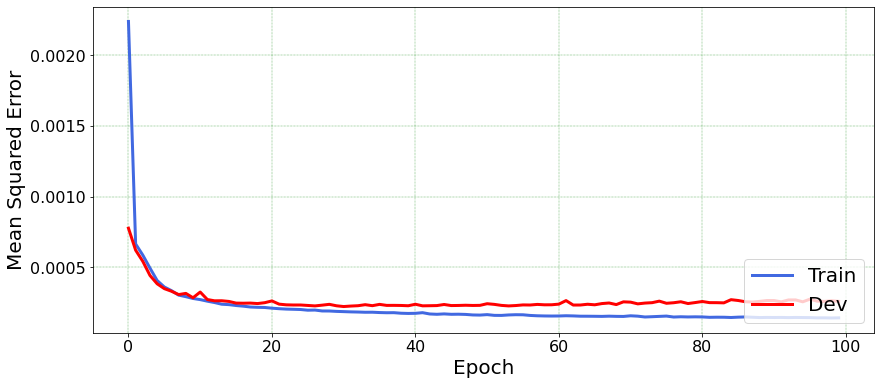

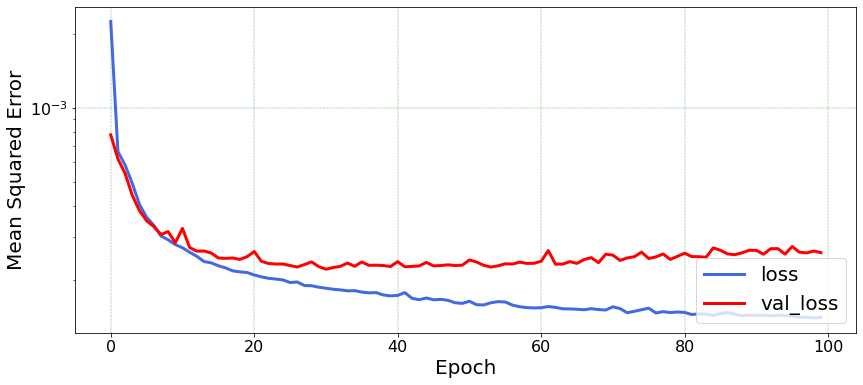

In [18]:
def printHistory(history):
       loss_curve = history.history["loss"]
       mse_curve = history.history["mean_squared_error"]

       loss_dev_curve = history.history["val_loss"]
       mse_dev_curve = history.history["val_mean_squared_error"]

       fig1, axs1 = plt.subplots(figsize=(14,6))
       axs1.plot(mse_curve, color='royalblue', alpha = 1, linewidth=3.0, label="Train")
       axs1.plot(mse_dev_curve, color='red', alpha = 1, linewidth=3.0, label="Dev")
       axs1.set_ylabel('Mean Squared Error', fontsize=20)
       axs1.set_xlabel('Epoch', fontsize=20)
       axs1.grid(color='g', ls = '-.', lw = 0.3)
       plt.xticks(fontsize = 16)
       plt.yticks(fontsize = 16)
       plt.legend(loc='lower right', fontsize=20)
       plt.show()
       
       fig2, axs2 = plt.subplots(figsize=(14,6))
       axs2.plot(mse_curve, color='royalblue', alpha = 1, linewidth=3.0, label="loss")
       axs2.plot(mse_dev_curve, color='red', alpha = 1, linewidth=3.0, label="val_loss")
       axs2.set_ylabel('Mean Squared Error', fontsize=20)
       axs2.set_yscale('log')
       axs2.set_xlabel('Epoch', fontsize=20)
       axs2.grid(color='g', ls = '-.', lw = 0.3)
       plt.xticks(fontsize = 16)
       plt.yticks(fontsize = 16)
       plt.legend(loc='lower right', fontsize=20)
       plt.show()
printHistory(history)

# 7. Evaluate the performance of the model

Load the model

In [22]:
model_1D = load_model("Conv1D.h5")

Inference speed

In [24]:
import time

start = time.time()
for i in range(1000):
    predictions = model_1D.predict(X_test[i])
end = time.time()

print("Inference speed = "+(end-start)/1000+" s")

ValueError: in user code:

    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\keras\layers\convolutional.py:249 call
        outputs = self._convolution_op(inputs, self.kernel)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\ops\nn_ops.py:1131 convolution_v2
        return convolution_internal(
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\ops\nn_ops.py:1261 convolution_internal
        return op(
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\util\deprecation.py:617 new_func
        return func(*args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\util\deprecation.py:617 new_func
        return func(*args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\ops\nn_ops.py:2003 conv1d
        result = gen_nn_ops.conv2d(
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py:968 conv2d
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py:3561 _create_op_internal
        ret = Operation(
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node model_1/conv1d_2/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](model_1/conv1d_2/conv1d/ExpandDims, model_1/conv1d_2/conv1d/ExpandDims_1)' with input shapes: [32,1,1,1], [1,2,1,64].
